## Karger Algorithm for weighted graph

You can find a detailed description of every function in support_function4.py

Pipeline:
1. converting interval of time
2. filtering dictionary using interval of time
3. KARGER ALGORITHM 
4. Visualization

### importing the data

In [1]:
import pickle
import random
import math

with open('../data/interactions.pickle', 'rb') as handle:
    my_dict = pickle.load(handle)

#(user2,time_stamp,score_associated_to_interaction)

In [2]:
from support_functions4 import *

### Part 1: converting time interval

In [3]:
#imagine to take in input date in format [(dd,mm,yyyy),(dd,mm,yyyy)]

#first day included, second day escluded
interval=[(29,7,2008),(30,7,2008)] 

converted_interval=convert_interval(interval)
converted_interval

[14116, 14117]

### Part 2: filtering dictionary using the interval

In [4]:
filtered_dictionary=filter_dictionary(my_dict,converted_interval)


In [5]:
len(filtered_dictionary)

232

Create the final dictionary eliminating the edges that start from a node a go to the same node and take the sum if there are two edges that start from the same node and point the same node.
This dictionary does not have timestamp anymore since we do not require it anymore

**Example** : 
* if i have {1:[(1,10)]} I drop this element since user1 gives an answer to himself
* if i have {1:[(2,10),(2,5)]} i take {'1,2':sum(10+5)}

In [6]:
G=final_transformation(filtered_dictionary)
len(G)

413

In [7]:
if(len(G))==0:
    print('in this interval we do not have users')

The dictionary has the format  {'user1,user2':[score_of_interactions]}: you can uncomment to see if you are curious 

In [8]:
#G

# Part 3: Karger Algorithm

 For the supernode I will use the format 'nodex|nodey|nodez' 


Contraction function: select a random node from a graph, take another node connected to the first one randon and merged them together creating a supernode

The following function computer a single iteration of Karger Algorithm but we are not sure that this will produce a correct an admissible result: we will need to run more times

### We can execute the algorith in a real situation: every check was positive so i expect a result, at least a non admissible one

In [9]:
min_cut,partitionA,partitionB=Karger(G,'17','51')

In [10]:
min_cut

10

# Visualization4 

We can decide between many different visualization but I think the most rappresentative one is the last cut between the two partitions of the graph.
In addition, is very difficult to represent a large number of links in a single image and this goes in opposite direction with respect to the idea of helping understand the process with an image.

In [11]:
import networkx as nx
G=nx.Graph()

In [12]:

G.add_edge('partitionA','partitionB',weight=min_cut)

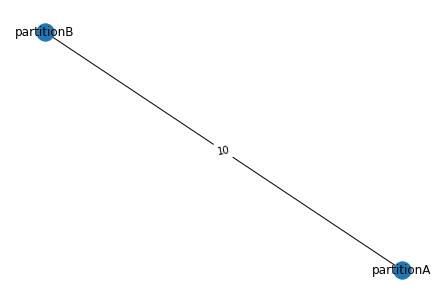

In [13]:
import matplotlib.pyplot as plt
nx.draw(G, with_labels=True)
pos=nx.spring_layout(G)
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels);